Split the attached metadata from Poore 2020's samples and using a random half of the data to train any binary predictor with a continuous output score to predict whether or not the sample is an ovarian cancer. Give me an ROC curve with its associated AUC. Recommendation is to binarize / one-hot encode all the distinct string values of the metadata columns and train a logistic regression.

# 1. Load packages

In [1]:
import pandas as pd
import matplotlib as plt

# 2. Read in datafile

In [2]:
data = pd.read_csv('poore-2020-metadata-subset.csv', index_col=[0])
data

,disease_type,sample_type,experimental_strategy,tissue_source_site_label,platform,data_submitting_center_label,portion_is_ffpe
0,Ovarian Serous Cystadenocarcinoma,Primary Tumor,RNA-Seq,UCSF,Illumina HiSeq,Canada's Michael Smith Genome Sciences Centre,NO
1,Ovarian Serous Cystadenocarcinoma,Primary Tumor,RNA-Seq,Washington University,Illumina HiSeq,Canada's Michael Smith Genome Sciences Centre,NO
2,Ovarian Serous Cystadenocarcinoma,Primary Tumor,RNA-Seq,Memorial Sloan Kettering,Illumina HiSeq,Canada's Michael Smith Genome Sciences Centre,NO
3,Ovarian Serous Cystadenocarcinoma,Recurrent Tumor,RNA-Seq,Duke,Illumina HiSeq,Canada's Michael Smith Genome Sciences Centre,NO
4,Ovarian Serous Cystadenocarcinoma,Primary Tumor,RNA-Seq,Duke,Illumina HiSeq,Canada's Michael Smith Genome Sciences Centre,NO
...,...,...,...,...,...,...,...
18111,Cholangiocarcinoma,Primary Tumor,RNA-Seq,Mayo Clinic Rochester,Illumina HiSeq,University of North Carolina,NO
18112,Cholangiocarcinoma,Primary Tumor,RNA-Seq,Not available,Illumina HiSeq,University of North Carolina,NO
18113,Cholangiocarcinoma,Primary Tumor,RNA-Seq,University of North Carolina,Illumina HiSeq,University of North Carolina,NO
18114,Cholangiocarcinoma,Primary Tumor,RNA-Seq,University of North Carolina,Illumina HiSeq,University of North Carolina,NO


# 3. EDA

## 3.1 Disease Type

In [3]:
data['disease_type'].value_counts()

Breast Invasive Carcinoma                                           1497
Uterine Corpus Endometrial Carcinoma                                1239
Kidney Renal Clear Cell Carcinoma                                   1142
Stomach Adenocarcinoma                                              1091
Ovarian Serous Cystadenocarcinoma                                   1031
Colon Adenocarcinoma                                                1017
Lung Adenocarcinoma                                                  951
Head and Neck Squamous Cell Carcinoma                                907
Thyroid Carcinoma                                                    880
Prostate Adenocarcinoma                                              830
Skin Cutaneous Melanoma                                              792
Brain Lower Grade Glioma                                             732
Bladder Urothelial Carcinoma                                         729
Lung Squamous Cell Carcinoma                       

In [4]:
print("Num samples of Ovarian Cancer:",
      len(data[data['disease_type']=='Ovarian Serous Cystadenocarcinoma']))
print("Num total samples:",len(data))
print("Proportion Ovarian:", 
      len(data[data['disease_type']=='Ovarian Serous Cystadenocarcinoma'])/len(data))

Num samples of Ovarian Cancer: 1031
Num total samples: 18116
Proportion Ovarian: 0.056911017884742766


## 3.2 Sample Type

In [5]:
data['sample_type'].value_counts()

Primary Tumor                                      14007
Blood Derived Normal                                1878
Solid Tissue Normal                                 1302
Metastatic                                           541
Primary Blood Derived Cancer - Peripheral Blood      258
Recurrent Tumor                                      118
Additional - New Primary                              11
Additional Metastatic                                  1
Name: sample_type, dtype: int64

## 3.3 Experimental Strategy

In [6]:
data['experimental_strategy'].value_counts()

RNA-Seq    13285
WGS         4831
Name: experimental_strategy, dtype: int64

## 3.4 Institution

In [7]:
data['tissue_source_site_label'].value_counts()

University of Pittsburgh                        1658
Indivumed                                       1358
Asterand                                         875
International Genomics Consortium                805
MSKCC                                            762
                                                ... 
Valley Hospital                                    1
Greenville Health Systems                          1
University of California San Diego                 1
Boston Medical Center                              1
BLN UT Southwestern Medical Center at Dallas       1
Name: tissue_source_site_label, Length: 194, dtype: int64

<AxesSubplot:ylabel='tissue_source_site_label'>

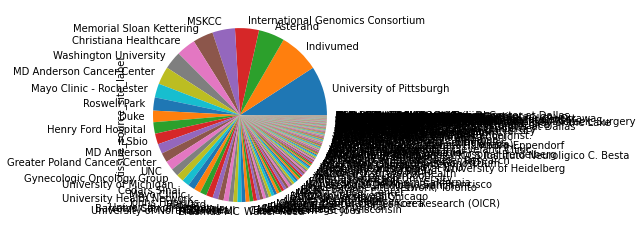

In [8]:
data['tissue_source_site_label'].value_counts().plot(kind='pie')

## 3.5 Sequencing Platform

In [9]:
data['platform'].value_counts()

Illumina HiSeq    16243
Illumina GA        1777
HiSeq X Ten          50
ABI SOLiD            40
LS 454                5
Illumina MiSeq        1
Name: platform, dtype: int64

## 3.6 Data Center

In [10]:
data['data_submitting_center_label'].value_counts()

University of North Carolina                          10953
Harvard Medical School                                 2041
Canada's Michael Smith Genome Sciences Centre          1993
Broad Institute of MIT and Harvard                     1206
Baylor College of Medicine                              688
Washington University School of Medicine                660
MD Anderson - Institute for Applied Cancer Science      526
Johns Hopkins / University of Southern California        38
MD Anderson - RPPA Core Facility (Proteomics)            11
Name: data_submitting_center_label, dtype: int64

## 3.7 FFPE?

In [11]:
data['portion_is_ffpe'].value_counts()

NO     18041
YES       74
Name: portion_is_ffpe, dtype: int64

# 4. One-hot encoding the metadata

In [12]:
one_hot_encoded_data = pd.get_dummies(data, columns=data.columns[1:]) 
one_hot_encoded_data

,disease_type,sample_type_Additional - New Primary,sample_type_Additional Metastatic,sample_type_Blood Derived Normal,sample_type_Metastatic,sample_type_Primary Blood Derived Cancer - Peripheral Blood,sample_type_Primary Tumor,sample_type_Recurrent Tumor,sample_type_Solid Tissue Normal,experimental_strategy_RNA-Seq,...,data_submitting_center_label_Broad Institute of MIT and Harvard,data_submitting_center_label_Canada's Michael Smith Genome Sciences Centre,data_submitting_center_label_Harvard Medical School,data_submitting_center_label_Johns Hopkins / University of Southern California,data_submitting_center_label_MD Anderson - Institute for Applied Cancer Science,data_submitting_center_label_MD Anderson - RPPA Core Facility (Proteomics),data_submitting_center_label_University of North Carolina,data_submitting_center_label_Washington University School of Medicine,portion_is_ffpe_NO,portion_is_ffpe_YES
0,Ovarian Serous Cystadenocarcinoma,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,Ovarian Serous Cystadenocarcinoma,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,Ovarian Serous Cystadenocarcinoma,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,Ovarian Serous Cystadenocarcinoma,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,Ovarian Serous Cystadenocarcinoma,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18111,Cholangiocarcinoma,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
18112,Cholangiocarcinoma,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
18113,Cholangiocarcinoma,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
18114,Cholangiocarcinoma,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


# 5. Split data in half randomly

In [13]:
from sklearn.model_selection import train_test_split

X = one_hot_encoded_data.iloc[:,1:]
y = list(one_hot_encoded_data['disease_type']=='Ovarian Serous Cystadenocarcinoma')

In [14]:
# optionally set random state to fix results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

### What does our split look like?

In [15]:
print(sum(y_train),"Ovarian cases in training data")
print(sum(y_test), "Ovarian cases in test data")

519 Ovarian cases in training data
512 Ovarian cases in test data


# 6. Train and test predictor

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [17]:
# train LR on training data
lr = LogisticRegression().fit(X_train, y_train)

# what is its accuracy when predicting back again on the training data?
print(roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]))

0.9985350001274894


In [18]:
# what is its accuracy when predicting on the test data?

print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

0.9971163638324947


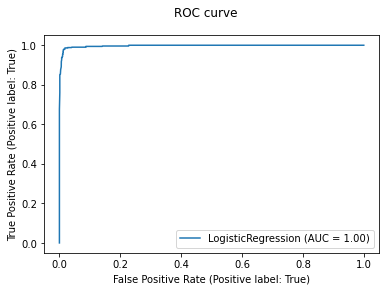

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

roc = RocCurveDisplay.from_estimator(lr, X_test, y_test)
roc.figure_.suptitle("ROC curve")
plt.show()

# 7. What if we don't use all the metadata?

## 7.1 Using only 'Sample Type'

In [20]:
X_small = one_hot_encoded_data.iloc[:,1:9]
y = list(one_hot_encoded_data['disease_type']=='Ovarian Serous Cystadenocarcinoma')

X_small

,sample_type_Additional - New Primary,sample_type_Additional Metastatic,sample_type_Blood Derived Normal,sample_type_Metastatic,sample_type_Primary Blood Derived Cancer - Peripheral Blood,sample_type_Primary Tumor,sample_type_Recurrent Tumor,sample_type_Solid Tissue Normal
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
18111,0,0,0,0,0,1,0,0
18112,0,0,0,0,0,1,0,0
18113,0,0,0,0,0,1,0,0
18114,0,0,0,0,0,1,0,0


In [21]:
# optionally set random state to fix results
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.5)

In [22]:
# train LR on training data
lr = LogisticRegression().fit(X_train, y_train)

# what is its accuracy when predicting back again on the training data?
print(roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]))

0.5878373623497761


In [23]:
# what is its accuracy when predicting on the test data?

print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

0.591041936194225


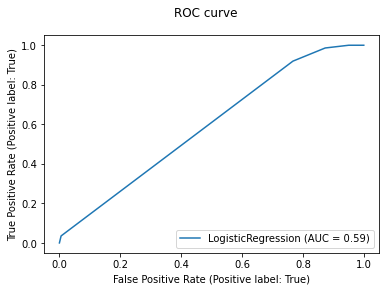

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

roc = RocCurveDisplay.from_estimator(lr, X_test, y_test)
roc.figure_.suptitle("ROC curve")
plt.show()

### Not so good, let's try something else...

## 7.2 Using only 'Tissue Source Site Label'

In [25]:
X_small = one_hot_encoded_data.filter(regex='site')
y = list(one_hot_encoded_data['disease_type']=='Ovarian Serous Cystadenocarcinoma')

X_small

,tissue_source_site_label_ABS - IUPUI,tissue_source_site_label_ABS - Lahey Clinic,tissue_source_site_label_ABS - Research Metrics Pakistan,tissue_source_site_label_ABS IUPUI,tissue_source_site_label_Albert Einstein Medical Center,tissue_source_site_label_Alberta Health Services,tissue_source_site_label_Asbestos Diseases Research Institute,tissue_source_site_label_Asterand,tissue_source_site_label_BC Cancer Agency,tissue_source_site_label_BLN - Baylor,...,tissue_source_site_label_Washington University - Cleveland Clinic,tissue_source_site_label_Washington University - Emory,tissue_source_site_label_Washington University - Mayo Clinic,tissue_source_site_label_Washington University - NYU,tissue_source_site_label_Washington University - Rush University,tissue_source_site_label_Washington University - St. Louis,tissue_source_site_label_Washington University St. Louis,tissue_source_site_label_Wills Eye Institute,tissue_source_site_label_Yale,tissue_source_site_label_Yale University
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# optionally set random state to fix results
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.5)

In [27]:
# train LR on training data
lr = LogisticRegression().fit(X_train, y_train)

# what is its accuracy when predicting back again on the training data?
print(roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]))

0.9313721496035652


In [28]:
# what is its accuracy when predicting on the test data?

print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

0.926211332342115


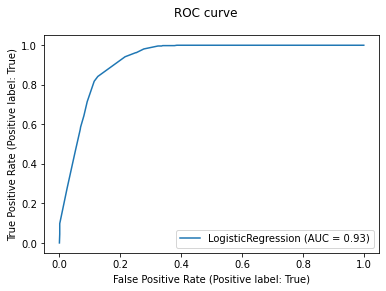

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

roc = RocCurveDisplay.from_estimator(lr, X_test, y_test)
roc.figure_.suptitle("ROC curve")
plt.show()

### Well, we got pretty good accuracy just from using the site where the tissue was sourced!